In [7]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import pickle
import datetime
import warnings
import time
from sklearn.model_selection import cross_val_score
from catboost import Pool
warnings.filterwarnings('ignore')

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

X =pd.read_csv('X.csv')
X_test = pd.read_csv('X_test.csv')
Y = pd.read_csv('Y.csv')

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

train_dataset = Pool(data=X_train,
                     label=y_train)

eval_dataset = Pool(data=X_test,
                    label=y_test)

LGBM = pickle.load(open('LGBMTunedV12', 'rb'))
XGB = pickle.load(open('XGB_tuned_02.pickle', 'rb'))
CatBoost = CatBoostClassifier(n_estimators=1500,task_type = "GPU",eval_metric='F1')
LGBM.fit(X_train,y_train)
XGB.fit(X_train,y_train)
CatBoost.fit(train_dataset,use_best_model=True,eval_set=eval_dataset)

print('début des pred')
predLGB = LGBM.predict_proba(X_test)
predXGB = XGB.predict_proba(X_test)
predCAT = CatBoost.predict_proba(X_test)
#print('f1_score',f1_score(y_test.values.astype(int),pred.astype(int)))

C:\Users\gouzm\Anaconda3\lib\site-packages\sklearn\base.py:253: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.20.1 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Learning rate set to 0.094115
0:	learn: 0.8734285	test: 0.8722503	best: 0.8722503 (0)	total: 14.6ms	remaining: 29.1s
1:	learn: 0.8801775	test: 0.8774988	best: 0.8774988 (1)	total: 28.4ms	remaining: 28.4s
2:	learn: 0.8819701	test: 0.8786775	best: 0.8786775 (2)	total: 42.4ms	remaining: 28.2s
3:	learn: 0.8820244	test: 0.8785586	best: 0.8786775 (2)	total: 56.7ms	remaining: 28.3s
4:	learn: 0.8820386	test: 0.8791450	best: 0.8791450 (4)	total: 70.8ms	remaining: 28.3s
5:	learn: 0.8822478	test: 0.8798427	best: 0.8798427 (5)	total: 84.4ms	remaining: 28s
6:	learn: 0.8816429	test: 0.8796709	best: 0.8798427 (5)	total: 98.1ms	remaining: 27.9s
7:	learn: 0.8816327	test: 0.8797729	best: 0.8798427 (5)	total: 112ms	remaining: 27.9s
8:	learn: 0.8827978	test: 0.8806065	best: 0.8806065 (8)	total: 126ms	remaining: 27.9s
9:	learn: 0.8830769	test: 0.8802821	best: 0.8806065 (8)	total: 141ms	remaining: 28.1s
10:	learn: 0.8830200	test: 0.8803607	best: 0.8806065 (8)	total: 155ms	remaining: 28s
11:	learn: 0.8831391

97:	learn: 0.8923625	test: 0.8849120	best: 0.8849120 (97)	total: 1.31s	remaining: 25.5s
98:	learn: 0.8924214	test: 0.8848345	best: 0.8849120 (97)	total: 1.33s	remaining: 25.5s
99:	learn: 0.8924085	test: 0.8847327	best: 0.8849120 (97)	total: 1.34s	remaining: 25.5s
100:	learn: 0.8925723	test: 0.8847194	best: 0.8849120 (97)	total: 1.35s	remaining: 25.5s
101:	learn: 0.8928456	test: 0.8845667	best: 0.8849120 (97)	total: 1.37s	remaining: 25.4s
102:	learn: 0.8928335	test: 0.8845667	best: 0.8849120 (97)	total: 1.38s	remaining: 25.4s
103:	learn: 0.8929810	test: 0.8845534	best: 0.8849120 (97)	total: 1.39s	remaining: 25.4s
104:	learn: 0.8930141	test: 0.8846176	best: 0.8849120 (97)	total: 1.41s	remaining: 25.4s
105:	learn: 0.8930763	test: 0.8848101	best: 0.8849120 (97)	total: 1.42s	remaining: 25.3s
106:	learn: 0.8931899	test: 0.8848101	best: 0.8849120 (97)	total: 1.43s	remaining: 25.3s
107:	learn: 0.8930763	test: 0.8847083	best: 0.8849120 (97)	total: 1.44s	remaining: 25.3s
108:	learn: 0.8930594	te

199:	learn: 0.8986641	test: 0.8850502	best: 0.8860818 (160)	total: 2.61s	remaining: 23.5s
200:	learn: 0.8987605	test: 0.8852290	best: 0.8860818 (160)	total: 2.62s	remaining: 23.5s
201:	learn: 0.8987490	test: 0.8852798	best: 0.8860818 (160)	total: 2.63s	remaining: 23.5s
202:	learn: 0.8989511	test: 0.8856504	best: 0.8860818 (160)	total: 2.65s	remaining: 23.4s
203:	learn: 0.8990250	test: 0.8854585	best: 0.8860818 (160)	total: 2.66s	remaining: 23.4s
204:	learn: 0.8989928	test: 0.8854454	best: 0.8860818 (160)	total: 2.67s	remaining: 23.4s
205:	learn: 0.8989074	test: 0.8855093	best: 0.8860818 (160)	total: 2.69s	remaining: 23.4s
206:	learn: 0.8990264	test: 0.8853814	best: 0.8860818 (160)	total: 2.7s	remaining: 23.4s
207:	learn: 0.8990680	test: 0.8855093	best: 0.8860818 (160)	total: 2.71s	remaining: 23.4s
208:	learn: 0.8991891	test: 0.8855733	best: 0.8860818 (160)	total: 2.72s	remaining: 23.3s
209:	learn: 0.8991003	test: 0.8856635	best: 0.8860818 (160)	total: 2.74s	remaining: 23.3s
210:	learn:

300:	learn: 0.9039571	test: 0.8858929	best: 0.8866972 (295)	total: 3.89s	remaining: 21.9s
301:	learn: 0.9040057	test: 0.8859815	best: 0.8866972 (295)	total: 3.9s	remaining: 21.9s
302:	learn: 0.9040471	test: 0.8858290	best: 0.8866972 (295)	total: 3.92s	remaining: 21.9s
303:	learn: 0.9040920	test: 0.8858929	best: 0.8866972 (295)	total: 3.93s	remaining: 21.9s
304:	learn: 0.9040605	test: 0.8856881	best: 0.8866972 (295)	total: 3.94s	remaining: 21.9s
305:	learn: 0.9041638	test: 0.8855601	best: 0.8866972 (295)	total: 3.95s	remaining: 21.9s
306:	learn: 0.9041225	test: 0.8857258	best: 0.8866972 (295)	total: 3.97s	remaining: 21.9s
307:	learn: 0.9042950	test: 0.8857258	best: 0.8866972 (295)	total: 3.98s	remaining: 21.9s
308:	learn: 0.9043911	test: 0.8856749	best: 0.8866972 (295)	total: 3.99s	remaining: 21.8s
309:	learn: 0.9044701	test: 0.8856618	best: 0.8866972 (295)	total: 4s	remaining: 21.8s
310:	learn: 0.9043875	test: 0.8859045	best: 0.8866972 (295)	total: 4.02s	remaining: 21.8s
311:	learn: 0.

399:	learn: 0.9085877	test: 0.8858060	best: 0.8866972 (295)	total: 5.17s	remaining: 20.7s
400:	learn: 0.9086184	test: 0.8856144	best: 0.8866972 (295)	total: 5.18s	remaining: 20.7s
401:	learn: 0.9087212	test: 0.8854489	best: 0.8866972 (295)	total: 5.2s	remaining: 20.7s
402:	learn: 0.9088615	test: 0.8855505	best: 0.8866972 (295)	total: 5.21s	remaining: 20.6s
403:	learn: 0.9088752	test: 0.8854997	best: 0.8866972 (295)	total: 5.22s	remaining: 20.6s
404:	learn: 0.9088992	test: 0.8854113	best: 0.8866972 (295)	total: 5.24s	remaining: 20.6s
405:	learn: 0.9088650	test: 0.8854752	best: 0.8866972 (295)	total: 5.25s	remaining: 20.6s
406:	learn: 0.9090567	test: 0.8854113	best: 0.8866972 (295)	total: 5.26s	remaining: 20.6s
407:	learn: 0.9089916	test: 0.8853982	best: 0.8866972 (295)	total: 5.28s	remaining: 20.6s
408:	learn: 0.9089642	test: 0.8853982	best: 0.8866972 (295)	total: 5.29s	remaining: 20.6s
409:	learn: 0.9090601	test: 0.8854620	best: 0.8866972 (295)	total: 5.31s	remaining: 20.6s
410:	learn:

496:	learn: 0.9127565	test: 0.8855932	best: 0.8866972 (295)	total: 6.53s	remaining: 19.7s
497:	learn: 0.9128276	test: 0.8858223	best: 0.8866972 (295)	total: 6.54s	remaining: 19.7s
498:	learn: 0.9128653	test: 0.8858223	best: 0.8866972 (295)	total: 6.56s	remaining: 19.7s
499:	learn: 0.9129470	test: 0.8857961	best: 0.8866972 (295)	total: 6.57s	remaining: 19.7s
500:	learn: 0.9129675	test: 0.8857323	best: 0.8866972 (295)	total: 6.59s	remaining: 19.7s
501:	learn: 0.9130492	test: 0.8856816	best: 0.8866972 (295)	total: 6.6s	remaining: 19.7s
502:	learn: 0.9131244	test: 0.8856816	best: 0.8866972 (295)	total: 6.61s	remaining: 19.7s
503:	learn: 0.9130696	test: 0.8858976	best: 0.8866972 (295)	total: 6.63s	remaining: 19.7s
504:	learn: 0.9131481	test: 0.8856685	best: 0.8866972 (295)	total: 6.64s	remaining: 19.7s
505:	learn: 0.9132437	test: 0.8855801	best: 0.8866972 (295)	total: 6.66s	remaining: 19.6s
506:	learn: 0.9131955	test: 0.8856816	best: 0.8866972 (295)	total: 6.67s	remaining: 19.6s
507:	learn:

592:	learn: 0.9171391	test: 0.8849193	best: 0.8866972 (295)	total: 7.86s	remaining: 18.7s
593:	learn: 0.9171876	test: 0.8849831	best: 0.8866972 (295)	total: 7.87s	remaining: 18.6s
594:	learn: 0.9172362	test: 0.8851990	best: 0.8866972 (295)	total: 7.89s	remaining: 18.6s
595:	learn: 0.9173003	test: 0.8850976	best: 0.8866972 (295)	total: 7.9s	remaining: 18.6s
596:	learn: 0.9174443	test: 0.8849963	best: 0.8866972 (295)	total: 7.91s	remaining: 18.6s
597:	learn: 0.9173458	test: 0.8849456	best: 0.8866972 (295)	total: 7.92s	remaining: 18.6s
598:	learn: 0.9175022	test: 0.8850733	best: 0.8866972 (295)	total: 7.94s	remaining: 18.6s
599:	learn: 0.9176413	test: 0.8850733	best: 0.8866972 (295)	total: 7.95s	remaining: 18.5s
600:	learn: 0.9176647	test: 0.8850733	best: 0.8866972 (295)	total: 7.96s	remaining: 18.5s
601:	learn: 0.9176555	test: 0.8850226	best: 0.8866972 (295)	total: 7.97s	remaining: 18.5s
602:	learn: 0.9177164	test: 0.8852009	best: 0.8866972 (295)	total: 7.99s	remaining: 18.5s
603:	learn:

692:	learn: 0.9215973	test: 0.8853660	best: 0.8866972 (295)	total: 9.14s	remaining: 17.2s
693:	learn: 0.9216289	test: 0.8854035	best: 0.8866972 (295)	total: 9.16s	remaining: 17.2s
694:	learn: 0.9215337	test: 0.8852759	best: 0.8866972 (295)	total: 9.17s	remaining: 17.2s
695:	learn: 0.9215624	test: 0.8853266	best: 0.8866972 (295)	total: 9.18s	remaining: 17.2s
696:	learn: 0.9215219	test: 0.8853266	best: 0.8866972 (295)	total: 9.2s	remaining: 17.2s
697:	learn: 0.9216403	test: 0.8853773	best: 0.8866972 (295)	total: 9.21s	remaining: 17.2s
698:	learn: 0.9216749	test: 0.8851746	best: 0.8866972 (295)	total: 9.22s	remaining: 17.2s
699:	learn: 0.9216980	test: 0.8851746	best: 0.8866972 (295)	total: 9.23s	remaining: 17.1s
700:	learn: 0.9218568	test: 0.8850469	best: 0.8866972 (295)	total: 9.24s	remaining: 17.1s
701:	learn: 0.9218943	test: 0.8851746	best: 0.8866972 (295)	total: 9.26s	remaining: 17.1s
702:	learn: 0.9219491	test: 0.8850601	best: 0.8866972 (295)	total: 9.27s	remaining: 17.1s
703:	learn:

794:	learn: 0.9254419	test: 0.8849497	best: 0.8866972 (295)	total: 10.4s	remaining: 15.8s
795:	learn: 0.9255251	test: 0.8848727	best: 0.8866972 (295)	total: 10.5s	remaining: 15.8s
796:	learn: 0.9253351	test: 0.8851015	best: 0.8866972 (295)	total: 10.5s	remaining: 15.8s
797:	learn: 0.9253525	test: 0.8851015	best: 0.8866972 (295)	total: 10.5s	remaining: 15.8s
798:	learn: 0.9254732	test: 0.8852290	best: 0.8866972 (295)	total: 10.5s	remaining: 15.8s
799:	learn: 0.9256403	test: 0.8850772	best: 0.8866972 (295)	total: 10.5s	remaining: 15.8s
800:	learn: 0.9256257	test: 0.8852422	best: 0.8866972 (295)	total: 10.5s	remaining: 15.8s
801:	learn: 0.9256950	test: 0.8851015	best: 0.8866972 (295)	total: 10.5s	remaining: 15.7s
802:	learn: 0.9257124	test: 0.8850509	best: 0.8866972 (295)	total: 10.6s	remaining: 15.7s
803:	learn: 0.9258392	test: 0.8851409	best: 0.8866972 (295)	total: 10.6s	remaining: 15.7s
804:	learn: 0.9258136	test: 0.8853696	best: 0.8866972 (295)	total: 10.6s	remaining: 15.7s
805:	learn

897:	learn: 0.9291006	test: 0.8854875	best: 0.8866972 (295)	total: 11.8s	remaining: 14.4s
898:	learn: 0.9291085	test: 0.8855511	best: 0.8866972 (295)	total: 11.8s	remaining: 14.4s
899:	learn: 0.9291153	test: 0.8854369	best: 0.8866972 (295)	total: 11.8s	remaining: 14.4s
900:	learn: 0.9291126	test: 0.8854875	best: 0.8866972 (295)	total: 11.8s	remaining: 14.4s
901:	learn: 0.9291032	test: 0.8855380	best: 0.8866972 (295)	total: 11.8s	remaining: 14.4s
902:	learn: 0.9292608	test: 0.8853976	best: 0.8866972 (295)	total: 11.8s	remaining: 14.4s
903:	learn: 0.9292408	test: 0.8855119	best: 0.8866972 (295)	total: 11.8s	remaining: 14.4s
904:	learn: 0.9292355	test: 0.8854482	best: 0.8866972 (295)	total: 11.9s	remaining: 14.3s
905:	learn: 0.9292703	test: 0.8853470	best: 0.8866972 (295)	total: 11.9s	remaining: 14.3s
906:	learn: 0.9292234	test: 0.8854107	best: 0.8866972 (295)	total: 11.9s	remaining: 14.3s
907:	learn: 0.9293730	test: 0.8854988	best: 0.8866972 (295)	total: 11.9s	remaining: 14.3s
908:	learn

998:	learn: 0.9326955	test: 0.8858270	best: 0.8866972 (295)	total: 13.1s	remaining: 13.1s
999:	learn: 0.9328625	test: 0.8859037	best: 0.8866972 (295)	total: 13.1s	remaining: 13.1s
1000:	learn: 0.9328102	test: 0.8857518	best: 0.8866972 (295)	total: 13.1s	remaining: 13.1s
1001:	learn: 0.9329372	test: 0.8854726	best: 0.8866972 (295)	total: 13.1s	remaining: 13.1s
1002:	learn: 0.9329248	test: 0.8856000	best: 0.8866972 (295)	total: 13.1s	remaining: 13s
1003:	learn: 0.9329198	test: 0.8855363	best: 0.8866972 (295)	total: 13.1s	remaining: 13s
1004:	learn: 0.9329023	test: 0.8855363	best: 0.8866972 (295)	total: 13.1s	remaining: 13s
1005:	learn: 0.9329248	test: 0.8854351	best: 0.8866972 (295)	total: 13.2s	remaining: 13s
1006:	learn: 0.9329796	test: 0.8853077	best: 0.8866972 (295)	total: 13.2s	remaining: 13s
1007:	learn: 0.9329821	test: 0.8852571	best: 0.8866972 (295)	total: 13.2s	remaining: 13s
1008:	learn: 0.9330169	test: 0.8851934	best: 0.8866972 (295)	total: 13.2s	remaining: 13s
1009:	learn: 0.

1094:	learn: 0.9358367	test: 0.8850003	best: 0.8866972 (295)	total: 14.3s	remaining: 11.8s
1095:	learn: 0.9358589	test: 0.8850003	best: 0.8866972 (295)	total: 14.4s	remaining: 11.8s
1096:	learn: 0.9358343	test: 0.8850003	best: 0.8866972 (295)	total: 14.4s	remaining: 11.8s
1097:	learn: 0.9359161	test: 0.8850640	best: 0.8866972 (295)	total: 14.4s	remaining: 11.8s
1098:	learn: 0.9359360	test: 0.8850003	best: 0.8866972 (295)	total: 14.4s	remaining: 11.8s
1099:	learn: 0.9359312	test: 0.8850003	best: 0.8866972 (295)	total: 14.4s	remaining: 11.8s
1100:	learn: 0.9359709	test: 0.8851015	best: 0.8866972 (295)	total: 14.4s	remaining: 11.8s
1101:	learn: 0.9359781	test: 0.8852028	best: 0.8866972 (295)	total: 14.4s	remaining: 11.8s
1102:	learn: 0.9359955	test: 0.8851015	best: 0.8866972 (295)	total: 14.4s	remaining: 11.7s
1103:	learn: 0.9359955	test: 0.8851653	best: 0.8866972 (295)	total: 14.5s	remaining: 11.7s
1104:	learn: 0.9360328	test: 0.8852290	best: 0.8866972 (295)	total: 14.5s	remaining: 11.7s

1191:	learn: 0.9390646	test: 0.8851166	best: 0.8866972 (295)	total: 15.6s	remaining: 10.6s
1192:	learn: 0.9390601	test: 0.8850529	best: 0.8866972 (295)	total: 15.6s	remaining: 10.6s
1193:	learn: 0.9390403	test: 0.8850023	best: 0.8866972 (295)	total: 15.7s	remaining: 10.6s
1194:	learn: 0.9391544	test: 0.8851803	best: 0.8866972 (295)	total: 15.7s	remaining: 10.6s
1195:	learn: 0.9391567	test: 0.8851166	best: 0.8866972 (295)	total: 15.7s	remaining: 10.5s
1196:	learn: 0.9391765	test: 0.8851672	best: 0.8866972 (295)	total: 15.7s	remaining: 10.5s
1197:	learn: 0.9392488	test: 0.8849386	best: 0.8866972 (295)	total: 15.7s	remaining: 10.5s
1198:	learn: 0.9392708	test: 0.8850154	best: 0.8866972 (295)	total: 15.7s	remaining: 10.5s
1199:	learn: 0.9392906	test: 0.8848880	best: 0.8866972 (295)	total: 15.7s	remaining: 10.5s
1200:	learn: 0.9392442	test: 0.8848880	best: 0.8866972 (295)	total: 15.7s	remaining: 10.5s
1201:	learn: 0.9393454	test: 0.8849780	best: 0.8866972 (295)	total: 15.8s	remaining: 10.5s

1288:	learn: 0.9419170	test: 0.8851054	best: 0.8866972 (295)	total: 16.9s	remaining: 9.33s
1289:	learn: 0.9418951	test: 0.8851054	best: 0.8866972 (295)	total: 16.9s	remaining: 9.32s
1290:	learn: 0.9419477	test: 0.8852703	best: 0.8866972 (295)	total: 16.9s	remaining: 9.3s
1291:	learn: 0.9420989	test: 0.8851429	best: 0.8866972 (295)	total: 17s	remaining: 9.29s
1292:	learn: 0.9421164	test: 0.8851429	best: 0.8866972 (295)	total: 17s	remaining: 9.28s
1293:	learn: 0.9421952	test: 0.8851429	best: 0.8866972 (295)	total: 17s	remaining: 9.26s
1294:	learn: 0.9421995	test: 0.8850923	best: 0.8866972 (295)	total: 17s	remaining: 9.25s
1295:	learn: 0.9421448	test: 0.8849780	best: 0.8866972 (295)	total: 17s	remaining: 9.24s
1296:	learn: 0.9421032	test: 0.8849780	best: 0.8866972 (295)	total: 17s	remaining: 9.22s
1297:	learn: 0.9421974	test: 0.8849780	best: 0.8866972 (295)	total: 17s	remaining: 9.21s
1298:	learn: 0.9422697	test: 0.8848637	best: 0.8866972 (295)	total: 17s	remaining: 9.2s
1299:	learn: 0.94

1386:	learn: 0.9451617	test: 0.8845714	best: 0.8866972 (295)	total: 18.2s	remaining: 8.04s
1387:	learn: 0.9452970	test: 0.8843429	best: 0.8866972 (295)	total: 18.2s	remaining: 8.03s
1388:	learn: 0.9452557	test: 0.8843934	best: 0.8866972 (295)	total: 18.2s	remaining: 8.02s
1389:	learn: 0.9452340	test: 0.8843429	best: 0.8866972 (295)	total: 18.2s	remaining: 8.01s
1390:	learn: 0.9452361	test: 0.8843802	best: 0.8866972 (295)	total: 18.3s	remaining: 7.99s
1391:	learn: 0.9452536	test: 0.8840505	best: 0.8866972 (295)	total: 18.3s	remaining: 7.98s
1392:	learn: 0.9453105	test: 0.8840505	best: 0.8866972 (295)	total: 18.3s	remaining: 7.97s
1393:	learn: 0.9453145	test: 0.8841780	best: 0.8866972 (295)	total: 18.3s	remaining: 7.95s
1394:	learn: 0.9454498	test: 0.8842550	best: 0.8866972 (295)	total: 18.3s	remaining: 7.94s
1395:	learn: 0.9454322	test: 0.8842923	best: 0.8866972 (295)	total: 18.3s	remaining: 7.93s
1396:	learn: 0.9455026	test: 0.8842418	best: 0.8866972 (295)	total: 18.3s	remaining: 7.91s

1483:	learn: 0.9478476	test: 0.8841756	best: 0.8866972 (295)	total: 19.5s	remaining: 6.77s
1484:	learn: 0.9479591	test: 0.8841624	best: 0.8866972 (295)	total: 19.5s	remaining: 6.76s
1485:	learn: 0.9479591	test: 0.8841624	best: 0.8866972 (295)	total: 19.5s	remaining: 6.75s
1486:	learn: 0.9479805	test: 0.8841118	best: 0.8866972 (295)	total: 19.5s	remaining: 6.73s
1487:	learn: 0.9479472	test: 0.8841756	best: 0.8866972 (295)	total: 19.5s	remaining: 6.72s
1488:	learn: 0.9479825	test: 0.8842394	best: 0.8866972 (295)	total: 19.5s	remaining: 6.71s
1489:	learn: 0.9480606	test: 0.8840745	best: 0.8866972 (295)	total: 19.6s	remaining: 6.7s
1490:	learn: 0.9480568	test: 0.8840745	best: 0.8866972 (295)	total: 19.6s	remaining: 6.68s
1491:	learn: 0.9480606	test: 0.8841251	best: 0.8866972 (295)	total: 19.6s	remaining: 6.67s
1492:	learn: 0.9480763	test: 0.8841251	best: 0.8866972 (295)	total: 19.6s	remaining: 6.66s
1493:	learn: 0.9480763	test: 0.8840613	best: 0.8866972 (295)	total: 19.6s	remaining: 6.64s


1584:	learn: 0.9504075	test: 0.8847473	best: 0.8866972 (295)	total: 20.8s	remaining: 5.45s
1585:	learn: 0.9504660	test: 0.8848111	best: 0.8866972 (295)	total: 20.8s	remaining: 5.43s
1586:	learn: 0.9504837	test: 0.8848485	best: 0.8866972 (295)	total: 20.8s	remaining: 5.42s
1587:	learn: 0.9505013	test: 0.8848242	best: 0.8866972 (295)	total: 20.8s	remaining: 5.41s
1588:	learn: 0.9504623	test: 0.8850023	best: 0.8866972 (295)	total: 20.9s	remaining: 5.39s
1589:	learn: 0.9504605	test: 0.8850660	best: 0.8866972 (295)	total: 20.9s	remaining: 5.38s
1590:	learn: 0.9504818	test: 0.8850660	best: 0.8866972 (295)	total: 20.9s	remaining: 5.37s
1591:	learn: 0.9504234	test: 0.8850660	best: 0.8866972 (295)	total: 20.9s	remaining: 5.35s
1592:	learn: 0.9505403	test: 0.8850154	best: 0.8866972 (295)	total: 20.9s	remaining: 5.34s
1593:	learn: 0.9505439	test: 0.8850660	best: 0.8866972 (295)	total: 20.9s	remaining: 5.33s
1594:	learn: 0.9506024	test: 0.8849517	best: 0.8866972 (295)	total: 20.9s	remaining: 5.32s

1682:	learn: 0.9527731	test: 0.8848617	best: 0.8866972 (295)	total: 22.1s	remaining: 4.16s
1683:	learn: 0.9527749	test: 0.8849628	best: 0.8866972 (295)	total: 22.1s	remaining: 4.15s
1684:	learn: 0.9528137	test: 0.8845692	best: 0.8866972 (295)	total: 22.1s	remaining: 4.14s
1685:	learn: 0.9529233	test: 0.8846836	best: 0.8866972 (295)	total: 22.1s	remaining: 4.12s
1686:	learn: 0.9529850	test: 0.8846330	best: 0.8866972 (295)	total: 22.2s	remaining: 4.11s
1687:	learn: 0.9529091	test: 0.8846462	best: 0.8866972 (295)	total: 22.2s	remaining: 4.1s
1688:	learn: 0.9528879	test: 0.8847099	best: 0.8866972 (295)	total: 22.2s	remaining: 4.08s
1689:	learn: 0.9529833	test: 0.8844439	best: 0.8866972 (295)	total: 22.2s	remaining: 4.07s
1690:	learn: 0.9529992	test: 0.8844945	best: 0.8866972 (295)	total: 22.2s	remaining: 4.06s
1691:	learn: 0.9530928	test: 0.8846857	best: 0.8866972 (295)	total: 22.2s	remaining: 4.04s
1692:	learn: 0.9531140	test: 0.8847231	best: 0.8866972 (295)	total: 22.2s	remaining: 4.03s


1779:	learn: 0.9547105	test: 0.8848526	best: 0.8866972 (295)	total: 23.4s	remaining: 2.89s
1780:	learn: 0.9548201	test: 0.8849032	best: 0.8866972 (295)	total: 23.4s	remaining: 2.88s
1781:	learn: 0.9548394	test: 0.8850680	best: 0.8866972 (295)	total: 23.4s	remaining: 2.86s
1782:	learn: 0.9548554	test: 0.8850043	best: 0.8866972 (295)	total: 23.4s	remaining: 2.85s
1783:	learn: 0.9549119	test: 0.8850043	best: 0.8866972 (295)	total: 23.4s	remaining: 2.84s
1784:	learn: 0.9549456	test: 0.8849780	best: 0.8866972 (295)	total: 23.4s	remaining: 2.82s
1785:	learn: 0.9549473	test: 0.8850417	best: 0.8866972 (295)	total: 23.5s	remaining: 2.81s
1786:	learn: 0.9549312	test: 0.8849911	best: 0.8866972 (295)	total: 23.5s	remaining: 2.8s
1787:	learn: 0.9549489	test: 0.8848263	best: 0.8866972 (295)	total: 23.5s	remaining: 2.78s
1788:	learn: 0.9549877	test: 0.8848789	best: 0.8866972 (295)	total: 23.5s	remaining: 2.77s
1789:	learn: 0.9549506	test: 0.8848153	best: 0.8866972 (295)	total: 23.5s	remaining: 2.76s


1884:	learn: 0.9571095	test: 0.8857273	best: 0.8866972 (295)	total: 24.7s	remaining: 1.51s
1885:	learn: 0.9571659	test: 0.8857273	best: 0.8866972 (295)	total: 24.8s	remaining: 1.5s
1886:	learn: 0.9571272	test: 0.8857404	best: 0.8866972 (295)	total: 24.8s	remaining: 1.48s
1887:	learn: 0.9571481	test: 0.8857404	best: 0.8866972 (295)	total: 24.8s	remaining: 1.47s
1888:	learn: 0.9571497	test: 0.8857273	best: 0.8866972 (295)	total: 24.8s	remaining: 1.46s
1889:	learn: 0.9571481	test: 0.8858171	best: 0.8866972 (295)	total: 24.8s	remaining: 1.44s
1890:	learn: 0.9572029	test: 0.8857665	best: 0.8866972 (295)	total: 24.8s	remaining: 1.43s
1891:	learn: 0.9571852	test: 0.8857029	best: 0.8866972 (295)	total: 24.8s	remaining: 1.42s
1892:	learn: 0.9572013	test: 0.8855886	best: 0.8866972 (295)	total: 24.8s	remaining: 1.4s
1893:	learn: 0.9572770	test: 0.8856017	best: 0.8866972 (295)	total: 24.9s	remaining: 1.39s
1894:	learn: 0.9571804	test: 0.8854875	best: 0.8866972 (295)	total: 24.9s	remaining: 1.38s
1

1983:	learn: 0.9593234	test: 0.8851205	best: 0.8866972 (295)	total: 26s	remaining: 210ms
1984:	learn: 0.9593427	test: 0.8849800	best: 0.8866972 (295)	total: 26s	remaining: 197ms
1985:	learn: 0.9593797	test: 0.8848658	best: 0.8866972 (295)	total: 26s	remaining: 184ms
1986:	learn: 0.9594552	test: 0.8848153	best: 0.8866972 (295)	total: 26.1s	remaining: 170ms
1987:	learn: 0.9594375	test: 0.8849163	best: 0.8866972 (295)	total: 26.1s	remaining: 157ms
1988:	learn: 0.9593604	test: 0.8850437	best: 0.8866972 (295)	total: 26.1s	remaining: 144ms
1989:	learn: 0.9593249	test: 0.8849295	best: 0.8866972 (295)	total: 26.1s	remaining: 131ms
1990:	learn: 0.9593827	test: 0.8850437	best: 0.8866972 (295)	total: 26.1s	remaining: 118ms
1991:	learn: 0.9594745	test: 0.8851448	best: 0.8866972 (295)	total: 26.1s	remaining: 105ms
1992:	learn: 0.9594345	test: 0.8851953	best: 0.8866972 (295)	total: 26.1s	remaining: 91.8ms
1993:	learn: 0.9594685	test: 0.8851953	best: 0.8866972 (295)	total: 26.1s	remaining: 78.7ms
199

In [111]:
predLGB = pd.DataFrame(predLGB[:,1])
predXGB = pd.DataFrame(predXGB[:,1])
predCAT = pd.DataFrame(predCAT[:,1])

In [113]:
predLGB = predLGB.rename( columns={0: "LGB"})
predXGB = predXGB.rename( columns={0: "XGB"})
predCAT = predCAT.rename( columns={0: "CAT"})

In [114]:
ensemble_pred = pd.concat([predLGB,predXGB,predCAT],axis=1)
ensemble_pred['mean'] = ensemble_pred.mean(axis='columns',numeric_only=True)

In [253]:
exit_coor =pd.read_csv('exit_coor.csv')

In [76]:
y_test = y_test.rename(columns={'0': "pred_true"})

In [222]:
y_pred = np.where(ensemble_pred['XGB'] > 0.5, 1,0)

In [223]:
print('f1_score',f1_score(y_test.values.astype(int),y_pred.astype(int)))

f1_score 0.8842443729903536


In [131]:
#f1_score 0.8869385647909138 all
#f1_score 0.8842443729903536 XGB
#f1_score 0.8876938039933634 LGB
#f1_score 0.8879339979374354 CAT

In [217]:
ensemble_pred.index = y_test.index

In [224]:
preds = pd.concat([y_test,ensemble_pred],axis=1)

In [232]:
preds = preds.sort_index()
X_test = X_test.sort_index()

In [236]:
preds = preds.rename(columns={'0': "pred_true"})
#ligne 24

In [254]:
exit_coor = exit_coor.iloc[X_test.index]

In [64]:
# X_test.to_csv("pres_x_test.csv",index=False)
# preds.to_csv("preds.csv",index=False)
# exit_coor.to_csv("coor.csv",index=False)
X_test = pd.read_csv('pres_x_test.csv')
preds = pd.read_csv('preds.csv')
exit_coor = pd.read_csv('coor.csv')

In [119]:
exit_coor.iloc[0]

x_exit    3.749610e+06
y_exit   -1.926594e+07
Name: 0, dtype: float64

In [88]:
df = X_test.iloc[0,3:81]
df = df.loc[(df!=0)]

In [144]:
x_entry = pd.DataFrame(df[:4].values)
x_entry = x_entry.rename(columns={0: "x_entry"})
y_entry = pd.DataFrame(df[4:8].values)
y_entry = y_entry.rename(columns={0: "y_entry"})
x_exit = pd.DataFrame(np.concatenate((exit_coor.iloc[0][0], df[8:11].values), axis=None))
x_exit = x_exit.rename(columns={0: "x_exit"})
y_exit = pd.DataFrame(np.concatenate((exit_coor.iloc[0][1], df[11:].values), axis=None))
y_exit = y_exit.rename(columns={0: "y_exit"})

In [161]:
d = pd.concat([x_entry,y_entry],axis=1)
d = d/1000000

(-19.26736306731616, -19.264955141087196)

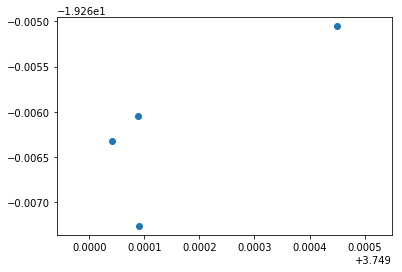

In [188]:
# libraries
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data
df=pd.DataFrame({'x': range(1,101), 'y': np.random.randn(100)*15+range(1,101) })

# Plot

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot( 'x_entry', 'y_entry', data=d, linestyle='none', marker='o')
ax1.set_xlim([d.min()[0]-0.0001, d.max()[0]+0.0001])
ax1.set_ylim([d.min()[1]-0.0001, d.max()[1]+0.0001])
# Add rectangle
# ax1.add_patch(
# patches.Rectangle(
# (20, 25), # (x,y)
# 50, # width
# 50, # height
# # You can add rotation as well with 'angle'
# alpha=0.3, facecolor="red", edgecolor="black", linewidth=3, linestyle='solid'
# )
# )


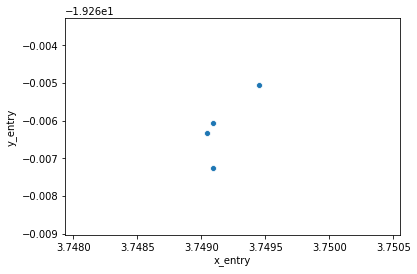

In [162]:
import seaborn as sns;
import matplotlib.pyplot as plt
ax = sns.scatterplot(x="x_entry", y="y_entry", data=d)

In [278]:
exit_coor.iloc[0]

x_exit    3.749610e+06
y_exit   -1.926594e+07
Name: 1, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
i=0
name = ['Lightgbm','XGBoost','CatBoost']
for model in [LGBM,XGB,CatBoost]:
    model.fit(X,Y)
    feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,X.columns)), columns=['Value','Feature'])
    feature_imp = feature_imp.sort_values(by="Value", ascending=False)
    feature_imp = feature_imp.head(20)

    plt.figure(figsize=(20, 10))
    plt.xscale('log')
    sns.barplot(x="Value", y="Feature", data=feature_imp)
    try : 
        plt.title(name[i]+' Features Importances')
    except AttributeError:
        print(name[i])
    plt.tight_layout()
    try:
        plt.savefig(name[i]+'_log_importances.png')
    except AttributeError:
        print(name[i])
    plt.show()
    i+=1

# GridSearch


In [11]:

print(datetime.datetime.now())
X = X
y = Y.astype(int)
param_grid = {
    'n_estimators': [2000,6000],
    'task_type': ['GPU'],
    'eval_metric': ['F1'],
    'learning_rate': [0.001,0.01,0.1],
    'max_depth': [7,9],
    'random_strength' : [1,10],
    'scale_pos_weight' : [3,10],
    'bagging_temperature' : [0.5,1]
}

kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
model = GridSearchCV(CatBoostClassifier(),param_grid, cv=kf.split(X, y),verbose=3, scoring= 'f1',iid=True)
model.fit(X,y)

print(model.best_score_)
print(model.best_params_)

print(datetime.datetime.now())

pickle.dump(model,open('CatBoost_tuned_v1','wb'))

# Mano Mano

In [9]:
X = X
y = Y.astype(int)

scores = []
iterations = []
skf = StratifiedKFold(n_splits=5,random_state=1)
kfold=1
for train_index, test_index in skf.split(X, y):
    print('K-Fold : ',kfold)
    kfold+=1
    t1 = datetime.datetime.now()
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    train_dataset = Pool(data=X_train,
                     label=y_train)

    eval_dataset = Pool(data=X_test,
                        label=y_test)

    clf = CatBoostClassifier(n_estimators=2500,max_depth=6,task_type = "GPU",random_strength=7,bagging_temperature=0.7,eval_metric='F1',silent=True)
    clf.fit(train_dataset, use_best_model=True,eval_set=eval_dataset)
    
    pred = clf.predict(X_test)
    score = f1_score(y_test.values.astype(int),pred.astype(int))
    scores.append(score)
    iterations.append(clf.best_iteration_)
    print('f1_score',score)
    print('elapsed : ',(datetime.datetime.now()-t1))

print('best score : ',np.mean(scores))
print('best iterations : ',max(iterations))

K-Fold :  1
f1_score 0.8904964539007093
elapsed :  0:00:45.066961
K-Fold :  2
f1_score 0.8861046223543568
elapsed :  0:00:45.678135
K-Fold :  3
f1_score 0.8901504399659381
elapsed :  0:00:45.719829
K-Fold :  4
f1_score 0.8912676056338028
elapsed :  0:00:45.219809
K-Fold :  5
f1_score 0.8897581792318635
elapsed :  0:00:44.384237
best score :  0.8895554602173341
best iterations :  1921


In [ ]:
CatBoostClassifier(n_estimators=3000,max_depth=6,task_type = "GPU",random_strength=7,bagging_temperature=0.7,eval_metric='F1',silent=True)
    
best score :  0.8895554602173341
best iterations :  1921